In [23]:
## TP de Aprendizam de Máquina
# Aluno: Geanderson Esteves dos Santos
# Professor: Adriano Veloso

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Set the variables.
unity = 100
learning_rate = 0.5

In [8]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [9]:
# Build the model.
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=2)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Training Error: %.2f%%" % (100-scores[1]*100))
#print(100-scores[1]*100)

In [10]:
## Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
# Para não tornar o número de testes fatoriais alguns valores das variáveis que serão testadas durante a realização
# do TP de ML irão ser mantidas em um certo valor, e.g., 
# 1 - Testar o Learning rate para os 3 gradientes deixando o número de unidades fixados no default

In [11]:
inputsSGD = []
outputsSGD = []
inputsMiniBatch = []
outputsMiniBatch = []

In [12]:
# Learning Rate 3 gradients Sthocastic Gradient Descent
lr = 0.5
unity = 25
inputsSGD.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsSGD.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 47s 9ms/step - loss: 3.5381 - acc: 0.1136 - val_loss: 2.4088 - val_acc: 0.1832
Epoch 2/10
5000/5000 [==============================] - 38s 8ms/step - loss: 2.7880 - acc: 0.1842 - val_loss: 3.5333 - val_acc: 0.1976
Epoch 3/10
5000/5000 [==============================] - 46s 9ms/step - loss: 2.7350 - acc: 0.1778 - val_loss: 3.6237 - val_acc: 0.1304
Epoch 4/10
5000/5000 [==============================] - 48s 10ms/step - loss: 2.9778 - acc: 0.1068 - val_loss: 3.0746 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 42s 8ms/step - loss: 3.0123 - acc: 0.0932 - val_loss: 2.7468 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 43s 9ms/step - loss: 3.0056 - acc: 0.1040 - val_loss: 2.5445 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 49s 10ms/step - loss: 3.0049 - acc: 0.1012 - val_loss: 3.6717 - val_acc: 0.1024
Epoch

In [13]:
lr = 1
unity = 25
inputsSGD.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsSGD.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 51s 10ms/step - loss: 4.9201 - acc: 0.0960 - val_loss: 6.1988 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 44s 9ms/step - loss: 4.9849 - acc: 0.1222 - val_loss: 3.0662 - val_acc: 0.1530
Epoch 3/10
5000/5000 [==============================] - 50s 10ms/step - loss: 3.5235 - acc: 0.1230 - val_loss: 4.1088 - val_acc: 0.1040
Epoch 4/10
5000/5000 [==============================] - 48s 10ms/step - loss: 3.8437 - acc: 0.0940 - val_loss: 3.7242 - val_acc: 0.1040
Epoch 5/10
5000/5000 [==============================] - 45s 9ms/step - loss: 3.7621 - acc: 0.1086 - val_loss: 4.4243 - val_acc: 0.0912
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 3.7879 - acc: 0.1002 - val_loss: 3.7726 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 36s 7ms/step - loss: 3.7621 - acc: 0.1082 - val_loss: 4.2383 - val_acc: 0.1040
Epoc

In [14]:
lr = 10
unity = 25
inputsSGD.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsSGD.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 45s 9ms/step - loss: 2.8706 - acc: 0.1066 - val_loss: 3.2623 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 45s 9ms/step - loss: 2.7187 - acc: 0.1794 - val_loss: 2.8463 - val_acc: 0.1618
Epoch 3/10
5000/5000 [==============================] - 42s 8ms/step - loss: 3.0998 - acc: 0.1380 - val_loss: 3.6482 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.9106 - acc: 0.1528 - val_loss: 2.6280 - val_acc: 0.1222
Epoch 5/10
5000/5000 [==============================] - 39s 8ms/step - loss: 2.7374 - acc: 0.1686 - val_loss: 2.3938 - val_acc: 0.2384
Epoch 6/10
5000/5000 [==============================] - 44s 9ms/step - loss: 2.5717 - acc: 0.1778 - val_loss: 3.1361 - val_acc: 0.1474
Epoch 7/10
5000/5000 [==============================] - 42s 8ms/step - loss: 2.5903 - acc: 0.1660 - val_loss: 2.7129 - val_acc: 0.1340
Epoch 8

In [15]:
# Mini-batch 10
lr = 0.5
unity = 25
inputsMiniBatch.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsMiniBatch.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 5s 1ms/step - loss: 1.6270 - acc: 0.3940 - val_loss: 0.8290 - val_acc: 0.7280
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6367 - acc: 0.7882 - val_loss: 0.4639 - val_acc: 0.8514
Epoch 3/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.4327 - acc: 0.8624 - val_loss: 0.4113 - val_acc: 0.8684
Epoch 4/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.3425 - acc: 0.8940 - val_loss: 0.2540 - val_acc: 0.9208
Epoch 5/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2877 - acc: 0.9090 - val_loss: 0.2565 - val_acc: 0.9146
Epoch 6/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2228 - acc: 0.9342 - val_loss: 0.1925 - val_acc: 0.9372
Epoch 7/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.1939 - acc: 0.9352 - val_loss: 0.1841 - val_acc: 0.9434
Epoch 8/10
500

In [16]:
# Mini-batch 10
lr = 1
unity = 25
inputsMiniBatch.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsMiniBatch.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/step - loss: 1.6581 - acc: 0.3782 - val_loss: 0.8003 - val_acc: 0.7028
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6481 - acc: 0.7848 - val_loss: 0.4537 - val_acc: 0.8568
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4558 - acc: 0.8544 - val_loss: 0.3698 - val_acc: 0.8802
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3584 - acc: 0.8894 - val_loss: 0.2672 - val_acc: 0.9166
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2964 - acc: 0.9114 - val_loss: 0.2320 - val_acc: 0.9294
Epoch 6/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2611 - acc: 0.9170 - val_loss: 0.1774 - val_acc: 0.9464
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2029 - acc: 0.9364 - val_loss: 0.1547 - val_acc: 0.9526
Epoch 8/10
500

In [17]:
# Mini-batch 10
lr = 10
unity = 25
inputsMiniBatch.append(lr)
model = baseline_model(unity, learning_rate)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print(100-scores[1]*100)
outputsMiniBatch.append(100-scores[1]*100)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/step - loss: 1.6366 - acc: 0.3936 - val_loss: 0.8520 - val_acc: 0.6888
Epoch 2/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6403 - acc: 0.7876 - val_loss: 0.5458 - val_acc: 0.8210
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4414 - acc: 0.8660 - val_loss: 0.3223 - val_acc: 0.9014
Epoch 4/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.3520 - acc: 0.8866 - val_loss: 0.3874 - val_acc: 0.8752
Epoch 5/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2854 - acc: 0.9118 - val_loss: 0.2254 - val_acc: 0.9342
Epoch 6/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.2237 - acc: 0.9300 - val_loss: 0.2101 - val_acc: 0.9370
Epoch 7/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.1932 - acc: 0.9398 - val_loss: 0.1414 - val_acc: 0.9564
Epoch 8/10
500

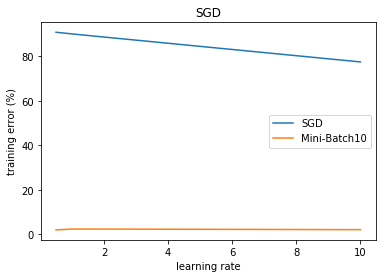

In [19]:
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch, outputsMiniBatch, label='Mini-Batch10')
plt.xlabel('learning rate')
plt.ylabel('training error (%)')
plt.title("SGD")
plt.legend()
plt.show()